In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import pickle
import time

In [18]:
##### Load files ######
file1 = open(r'C:\Users\khan1\jupyter_test_code\step1_crop_morphology_time.pkl', 'rb') #img55 all the segmneted points
step1_time = pickle.load(file1)
file1.close()

file2 = open(r'C:\Users\khan1\jupyter_test_code\step2_cluster_time.pkl', 'rb') #img55 all the segmneted points
step2_time = pickle.load(file2)
file1.close()

file22 = open(r'C:\Users\khan1\jupyter_test_code\step22_del_outlier_time.pkl', 'rb') #img55 all the segmneted points
step22_time = pickle.load(file22)
file1.close()

file23 = open(r'C:\Users\khan1\jupyter_test_code\step23_center_dis_time.pkl', 'rb') #img55 all the segmneted points
step23_time = pickle.load(file23)
file1.close()

# file3 = open(r'C:\Users\khan1\jupyter_test_code\step3_linefit_time.pkl', 'rb') #img55 all the segmneted points
# step3_time = pickle.load(file3)
# file1.close()

file3 = open(r'C:\Users\khan1\jupyter_test_code\step3_ransac_time.pkl', 'rb') #img55 all the segmneted points
step3_time = pickle.load(file3)
file1.close()

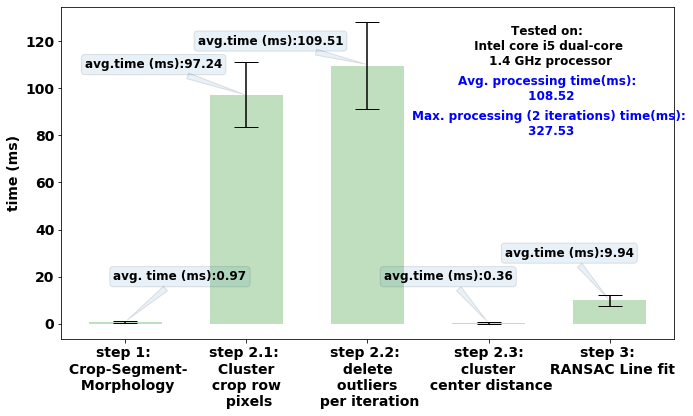

In [45]:
# print("step 2. ROI and Morphology mean time",np.array(step3_time).mean()*1000,"ms")
# print("step 2. ROI and Morphology std",np.array(step3_time).std()*1000,"ms")
# print("step 2. ROI and Morphology avg time",np.average(np.array(step3_time))*1000,"ms")
# print("step 2. ROI and Morphology variance",np.array(step3_time).var()*1000,"ms")

x = np.array(["step 1: \n Crop-Segment-\n Morphology","step 2.1: \n Cluster \n crop row \n pixels", 
              "step 2.2: \n delete \n outliers \n per iteration", 
              "step 2.3:\n cluster \n center distance","step 3: \n RANSAC Line fit"])
y = np.array([np.array(step1_time).mean()*1000, np.array(step2_time).mean()*1000, np.array(step22_time).mean()*1000,
             np.array(step23_time).mean()*1000, np.array(step3_time).mean()*1000])
x_pos = np.arange(len(x))
std = np.array([np.array(step1_time).std()*1000, np.array(step2_time).std()*1000, np.array(step22_time).std()*1000,
               np.array(step23_time).std()*1000, np.array(step3_time).std()*1000])

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x_pos, y, yerr=std, align='center',alpha = 0.25,color = 'green', capsize=12, width = 0.6)

ax.annotate('avg. time (ms):{0:.2f}'.format(np.array(step1_time).mean()*1000), xy=(0, 0.96),
xytext=(1, 20),size=12, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

ax.annotate('avg.time (ms):{0:.2f}'.format(np.array(step2_time).mean()*1000), xy=(1, 97),
xytext=(0.8, 110),size=12, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

ax.annotate('avg.time (ms):{0:.2f}'.format(np.array(step22_time).mean()*1000), xy=(2, 110),
xytext=(1.8, 120),size=12, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

ax.annotate('avg.time (ms):{0:.2f}'.format(np.array(step23_time).mean()*1000), xy=(3, 0.36),
xytext=(3.2, 20),size=12, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

ax.annotate('avg.time (ms):{0:.2f}'.format(np.array(step3_time).mean()*1000), xy=(4, 10),
xytext=(4.2, 30),size=12, ha='right', va="center",
bbox=dict(boxstyle="round", alpha=0.1),
arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1))

style = dict(size=12, color='black')
ax.text(3.5, 110, "Tested on: \n Intel core i5 dual-core \n 1.4 GHz processor",ha = 'center', **style)

ax.text(3.5, 95, 'Avg. processing time(ms): \n {0:.2f}'.format(np.array(step2_time).mean()*1000+
                                                          np.array(step1_time).mean()*1000+
                                                          np.array(step23_time).mean()*1000+
                                                          np.array(step3_time).mean()*1000),ha = 'center', size=12, color='b')

ax.text(3.5, 80, 'Max. processing (2 iterations) time(ms):\n {0:.2f}'.format(np.array(step2_time).mean()*1000+
                                                          np.array(step1_time).mean()*1000+
                                                          np.array(step23_time).mean()*1000+
                                                          np.array(step3_time).mean()*1000+
                                                          np.array(step22_time).mean()*1000*2),ha = 'center', size=12, color='b')

ax.set_ylabel("time (ms)", fontsize = 14)
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
plt.tight_layout()
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams.update({'font.size': 14})
#plt.ylim([0,2])
#plt.show()
#plt.savefig(r'C:\Users\khan1\jupyter_test_code\saved_fig\processing_time_ransac_new.png', bbox_inches='tight')